# Case Study Project - Travel Insurance

Travel Assured is a travel insurance company. Due to the COVID pandemic, they have had to cut their marketing budget by over 50%. It is more important than ever that they advertise in the right places and to the right people. Travel Assured has plenty of data on their current customers as well as people who got quotes but never bought insurance. They want to know if there are differences in the travel habits between customers and non-customers - they believe they are
more likely to travel often (buying tickets from frequent flyer miles) and travel abroad, You will be presenting to the CEO.
### Data
- Age : Numeric, the customer’s age
- Employment Type :  Character, the sector of employment
- GraduateOrNot : Character, whether the customer is a college graduate
- AnnualIncome : Numeric, the customer’s yearly income
- FamilyMembers : Numeric, the number of family members living with the customer
- ChronicDiseases : Numeric, whether the customer has any chronic conditions
- FrequentFlyer : Character, whether a customer books frequent tickets 
- EverTravelledAbroad : Character, has the customer ever travelled abroad
- TravelInsurance : Numeric, whether the customer bought travel insurance

### Table of Contents
- Exploratory Data Analysis
- Conclusions 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sns
from sklearn import preprocessing 

%matplotlib inline
df = pd.read_csv('travel_insurance.csv')

# Exploratory Data Analysis

In [4]:
display(df.sample(5))
display( df.info())
display( df.describe())
display(df.shape)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1269,31,Government Sector,Yes,1200000,3,0,No,No,0
666,28,Private Sector/Self Employed,Yes,800000,5,0,No,No,0
1961,26,Government Sector,Yes,500000,3,0,No,No,0
131,28,Private Sector/Self Employed,Yes,750000,4,0,No,No,0
543,34,Private Sector/Self Employed,Yes,850000,3,1,No,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


None

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


(1987, 9)

Text(0.5, 0.98, "bought insurance vs Didn't  bought insurance")

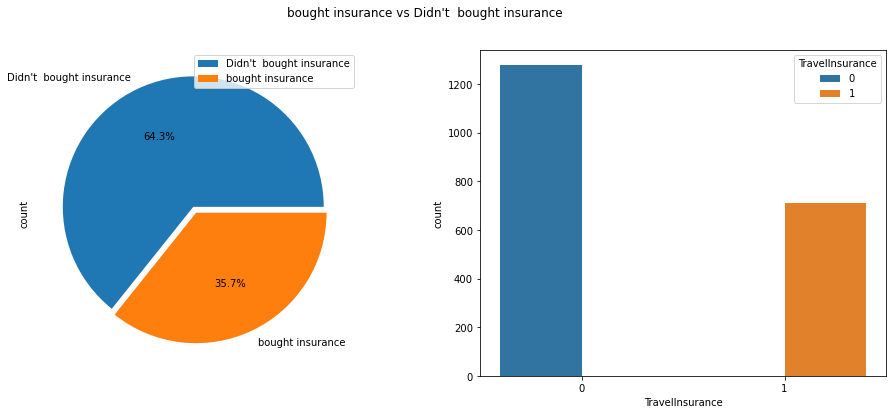

In [5]:
total_Noshow=df['TravelInsurance'].value_counts()
total_Noshow.index=["Didn't  bought insurance","bought insurance"]

f,ax=plt.subplots(1,2,figsize=(16,6))
total_Noshow.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='TravelInsurance',hue="TravelInsurance",data=df,ax=ax[1])
f.suptitle("bought insurance vs Didn't  bought insurance")

- We note that the customers who Didn't bought insurance (64.3%) rate is large



###  Average age of those who bought Travel Insurance.

Text(0.5, 0.98, "bought insurance Age Distribution vs Not  Didn't bought insurance Age Distribution")

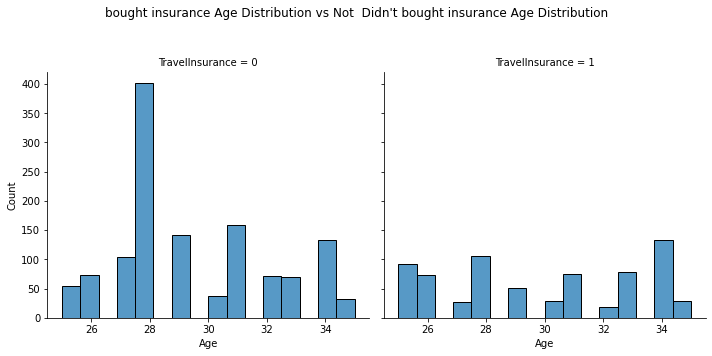

In [6]:
rel =sns.displot(x="Age", col="TravelInsurance",data=df)
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle("bought insurance Age Distribution vs Not  Didn't bought insurance Age Distribution")

In [7]:
Age_mean=df.groupby('TravelInsurance')['Age'].mean()
Age_mean.index=["the average age of those who Didn't bought insurance : ",'the average age of those who bought insurance']
Age_mean

the average age of those who Didn't bought insurance :     29.517619
the average age of those who bought insurance              29.888732
Name: Age, dtype: float64

-  Note: It's about the same rate, I don't think age has anything to do with buying Travel insurance
-  Note:The average age is the same whether you buy or not
-  Note: Almost the same distribution, except that people at the age of 27 are the least in the purchase process, despite their large number

###  Does the Employment Type have anything to do with whether he will buy or not ?

#### First, let's get to know the types of employment and what is the most common type

Text(0.5, 0.98, 'Private Sector/Self Employed vs Government Sector')

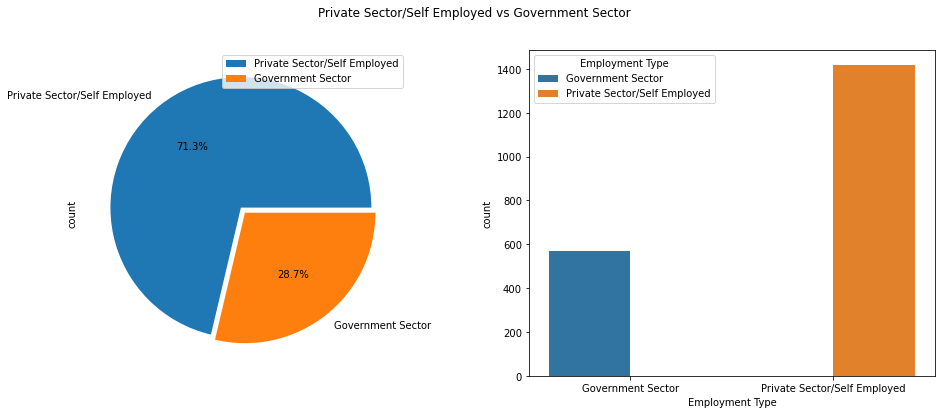

In [8]:
DFEmployment=df['Employment Type'].value_counts()

f,ax=plt.subplots(1,2,figsize=(16,6))
DFEmployment.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='Employment Type',hue="Employment Type",data=df,ax=ax[1])
f.suptitle("Private Sector/Self Employed vs Government Sector")

-  Note: We note that the people their Employment Type is Private Sector/Self Employed Their ratio (71.3%) is more.
####  let's see if Employment Type has anything to do with the purchase 

Text(0.5, 1.0, 'Employment Type vs Travel Insurance')

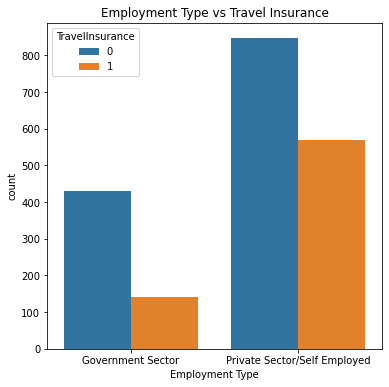

In [9]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='Employment Type',hue="TravelInsurance",data=df)
plt.title("Employment Type vs Travel Insurance")

In [10]:
df.groupby(['Employment Type','TravelInsurance'])['Employment Type'].count() / df.groupby('Employment Type')['Employment Type'].count()

Employment Type               TravelInsurance
Government Sector             0                  0.754386
                              1                  0.245614
Private Sector/Self Employed  0                  0.597742
                              1                  0.402258
Name: Employment Type, dtype: float64

- Note: People whose Employment Type is Private Sector/Self Employed has a greater percentage in the purchase process, as the percentage of their purchase is 0.402258, while the percentage of their purchase whose  work Government Sector is 0.245614

###### We suppose that if a person is a graduate, his opportunity to work is greater, and therefore a greater Annual Income, but does it have anything to do with the fact that the person buys travel insurance? 
### Let's see if there is a relationship between being a graduate and Annual Income

0.10806586483580931

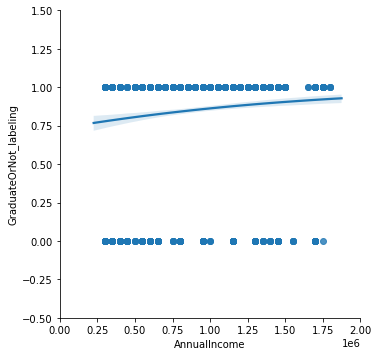

In [11]:
#get mappings of a label encoder 
le=preprocessing.LabelEncoder()
df['GraduateOrNot_labeling'] = le.fit_transform(df['GraduateOrNot'])
sns.lmplot(x="AnnualIncome", y="GraduateOrNot_labeling", data=df,   logistic=True, truncate=False)
plt.ylim(-0.5, 1.5)
plt.xlim(0, 2000000)
display(df['GraduateOrNot_labeling'].corr(df['AnnualIncome']))

- There is a positive but weak relationship

### Does being a graduate or not have anything to do with whether or not he buys?

In [12]:
display(df['GraduateOrNot_labeling'].corr(df['TravelInsurance']))

0.01893351894198786

Text(0.5, 0.98, 'Graduate Or Not')

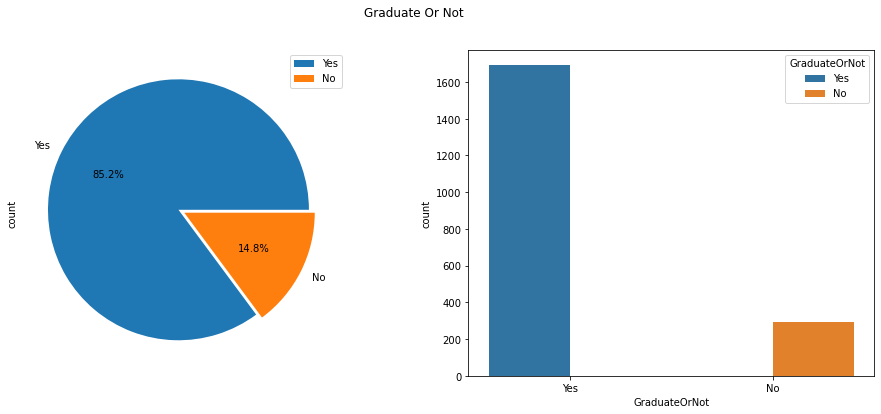

In [13]:
DFGraduateOrNot=df['GraduateOrNot'].value_counts()

f,ax=plt.subplots(1,2,figsize=(16,6))
DFGraduateOrNot.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='GraduateOrNot',hue="GraduateOrNot",data=df,ax=ax[1])
f.suptitle("Graduate Or Not")

-  Note: We note that the people Graduate Their ratio (85.2%) is more.
####  let's see if Graduate Or Not has anything to do with the purchase 

Text(0.5, 1.0, 'GraduateOrNot vs Travel Insurance')

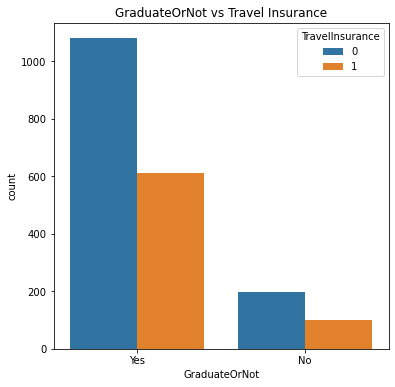

In [14]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='GraduateOrNot',hue="TravelInsurance",data=df)
plt.title("GraduateOrNot vs Travel Insurance")

In [15]:
df.groupby(['GraduateOrNot','TravelInsurance'])['GraduateOrNot'].count() / df.groupby('GraduateOrNot')['GraduateOrNot'].count()

GraduateOrNot  TravelInsurance
No             0                  0.664407
               1                  0.335593
Yes            0                  0.638889
               1                  0.361111
Name: GraduateOrNot, dtype: float64

- Note: Regardless of whether a person is a graduate or not, you find that the probability of their purchase is equal, as their purchase rates are equal.

### Let's explore annual income data for people to know the impact of income on the ability to buy travel insurance

Text(0.5, 1.0, 'Annual Income distribution vs Travel Insurance')

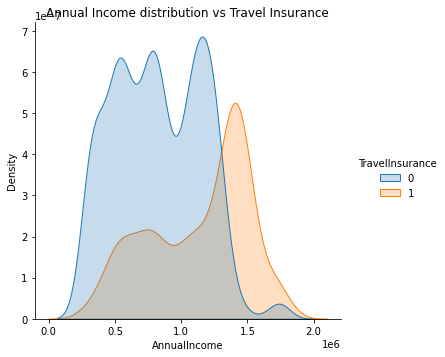

In [16]:
sns.displot(df, x="AnnualIncome", hue="TravelInsurance", kind="kde", fill=True)
plt.title('Annual Income distribution vs Travel Insurance')

- It clearly shows, that those with higher annual incomes are superior at buying travel insurance. Let's be sure.

0.396763204279091

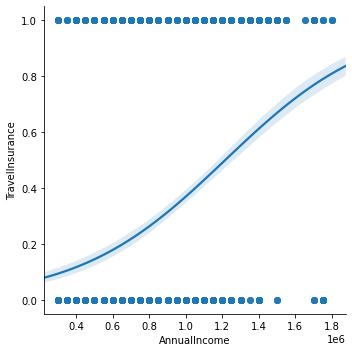

In [17]:
sns.lmplot(x="AnnualIncome", y="TravelInsurance", data=df,   logistic=True, truncate=False)
display(df['TravelInsurance'].corr(df['AnnualIncome']))

- There is a positive and moderate  relationship

Text(0.5, 0.98, 'high Annual Income vs low Annual Income')

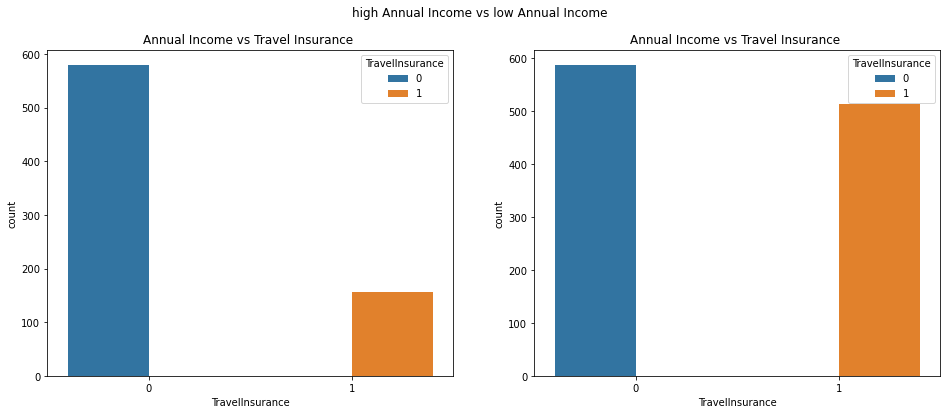

In [18]:
low_AnnualIncome=df[(df['AnnualIncome']<800000)]
high_AnnualIncome=df[(df['AnnualIncome']>800000)]



f,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot(x='TravelInsurance',hue='TravelInsurance',data=low_AnnualIncome,ax=ax[0])
ax[0].set_title("Annual Income vs Travel Insurance ")

sns.countplot(x='TravelInsurance',hue='TravelInsurance',data=high_AnnualIncome,ax=ax[1])
ax[1].set_title("Annual Income vs Travel Insurance ")
f.suptitle("high Annual Income vs low Annual Income")

- The number of people who do not buy travel insurance is approximately equal, whether their income is high or low, but see the difference who buy travel insurance, the number is clearly higher for high-income people.
- We conclude that high-income people buy more, so we should care about that

### Does the number of family members affect me if he buys insurance or not?

Text(0.5, 1.0, 'Family Members vs Travel Insurance')

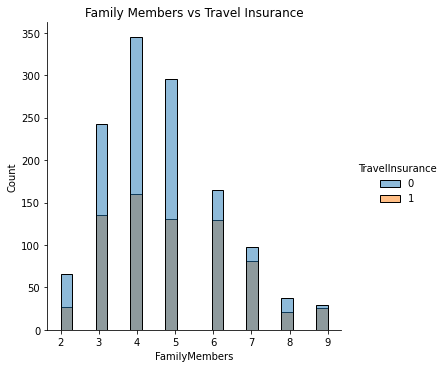

In [19]:
sns.displot(df, x="FamilyMembers", hue="TravelInsurance")
plt.title('Family Members vs Travel Insurance')

- Both distributions are similar, let's go deeper

- We settled it early, when the number of family members was more than five, the proportion of buyers increases and approached 50 percent.

Text(0.5, 0.98, 'Percentage of people with chronic diseases')

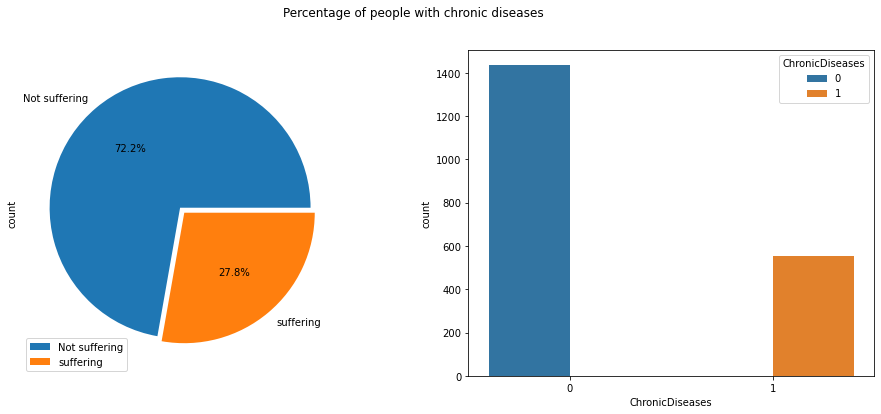

In [20]:
dfChronicDiseases=df['ChronicDiseases'].value_counts()
dfChronicDiseases.index=["Not suffering","suffering"]

f,ax=plt.subplots(1,2,figsize=(16,6))
dfChronicDiseases.plot.pie(explode=[0.05,0],autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('count')
ax[0].legend()

sns.countplot(x='ChronicDiseases',hue="ChronicDiseases",data=df,ax=ax[1])
f.suptitle("Percentage of people with chronic diseases")

Text(0.5, 1.0, 'Chronic Diseases vs Travel Insurance')

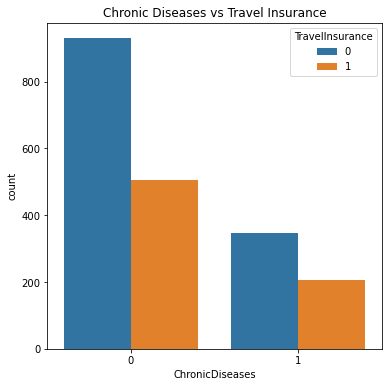

In [21]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='ChronicDiseases',hue="TravelInsurance",data=df)
plt.title("Chronic Diseases vs Travel Insurance")

In [22]:
df.groupby(['ChronicDiseases','TravelInsurance'])['ChronicDiseases'].count() / df.groupby('ChronicDiseases')['ChronicDiseases'].count()

ChronicDiseases  TravelInsurance
0                0                  0.648084
                 1                  0.351916
1                0                  0.628623
                 1                  0.371377
Name: ChronicDiseases, dtype: float64

Note: Regardless of whether a person is suffering or not,  their purchase rates are equal.

### Let's continue what we started, a client who books frequent tickets will probably buy travel insurance to make sure!
Let's see if there is a relationship between the fact that people book frequent tickets and if they will buy travel insurance

Text(0.5, 1.0, 'correlation coefficient Frequent Flyer and Travel Insurance ')

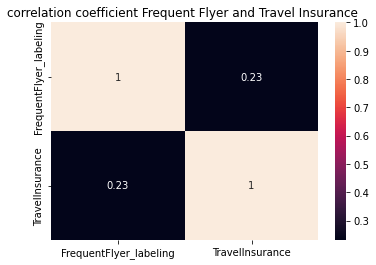

In [23]:
#get mappings of a label encoder 
le=preprocessing.LabelEncoder()
df['FrequentFlyer_labeling'] = le.fit_transform(df['FrequentFlyer'])
display()
f,ax=plt.subplots(1,1,figsize=(6,4))

sns.heatmap(df[['FrequentFlyer_labeling','TravelInsurance']].corr(),annot=True)
ax.set_title('correlation coefficient Frequent Flyer and Travel Insurance ')

- Positive relationship but weak, let's make sure

Text(0.5, 1.0, 'Frequent Flyer vs Travel Insurance')

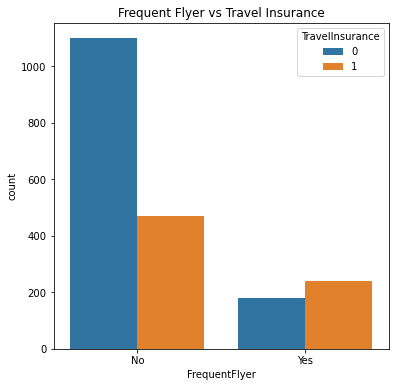

In [24]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='FrequentFlyer',hue="TravelInsurance",data=df)
plt.title("Frequent Flyer vs Travel Insurance")

In [25]:
df.groupby(['FrequentFlyer','TravelInsurance'])['FrequentFlyer'].count() / df.groupby('FrequentFlyer')['FrequentFlyer'].count()

FrequentFlyer  TravelInsurance
No             0                  0.700000
               1                  0.300000
Yes            0                  0.426859
               1                  0.573141
Name: FrequentFlyer, dtype: float64

- We can clearly say that if a person Frequent Flyer, the probability of buying travel insurance is greater.

### We have reached the end now, how can the client's travel abroad be a reason for him to buy travel insurance? Is this possible?

Text(0.5, 1.0, 'correlation coefficient Ever Travelled Abroad  and Travel Insurance ')

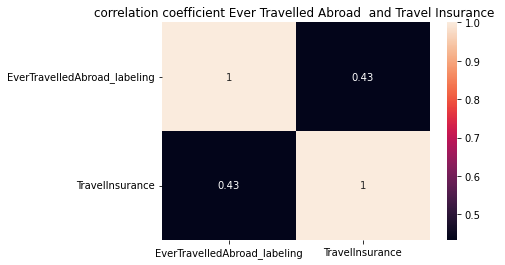

In [26]:
#get mappings of a label encoder 
le=preprocessing.LabelEncoder()
df['EverTravelledAbroad_labeling'] = le.fit_transform(df['EverTravelledAbroad'])
display()
f,ax=plt.subplots(1,1,figsize=(6,4))

sns.heatmap(df[['EverTravelledAbroad_labeling','TravelInsurance']].corr(),annot=True)
ax.set_title('correlation coefficient Ever Travelled Abroad  and Travel Insurance ')

- It seems that the relationship is moderate and positive. Perhaps if the customer travels abroad before, he will increase the likelihood of purchasing travel insurance.

Text(0.5, 1.0, 'Ever Travelled Abroad vs Travel Insurance')

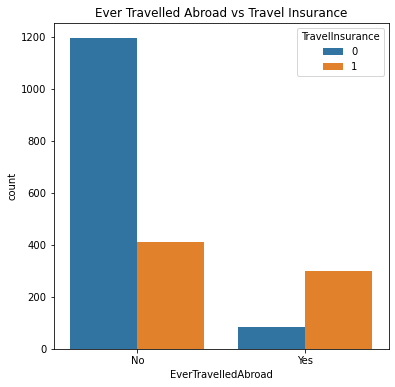

In [27]:
f,ax=plt.subplots(1,figsize=(6,6))
sns.countplot(x='EverTravelledAbroad',hue="TravelInsurance",data=df)
plt.title("Ever Travelled Abroad vs Travel Insurance")


In [28]:
df.groupby(['EverTravelledAbroad','TravelInsurance'])['EverTravelledAbroad'].count() / df.groupby('EverTravelledAbroad')['EverTravelledAbroad'].count()

EverTravelledAbroad  TravelInsurance
No                   0                  0.743622
                     1                  0.256378
Yes                  0                  0.215789
                     1                  0.784211
Name: EverTravelledAbroad, dtype: float64

- Well, the matter is very clear here for the customers who traveled abroad because of their desire to buy travel insurance more than others, Their ratio is 0.8 Approximately

# Conclusions
- We note that the customers who Didn't bought insurance (64.3%) rate is large
- I don't think age has anything to do with buying Travel insurance
- The customer's type of employment is the private sector / self-employed and their percentage is (71.3%), where the percentage of their purchases is 0.402258, while the percentage of their purchases in the government sector is 0.245614, so we must give this category some attention in our Marketing campaign.
- that high-income customer buy travel insurance more, so we should care about that
- When Customer is Frequent Flyer, the probability of buying travel insurance is greater.
- Customers who traveled abroad want to buy travel insurance more than others, approximately 0.8